# TensorFlow+DeepLearning 소스코드 - 1일차
- 1일차 수업에 사용된 소스코드를 정리

>[TensorFlow+DeepLearning 소스코드 - 1일차](#scrollTo=C0QvVhPXJTuZ)

>>[1교시](#scrollTo=ahGFuVBERtRe)

>>>[1-5. TensorFlow 작동원리](#scrollTo=VhNLu6m8dD4L)

>>>>[EX01. 선형함수](#scrollTo=vNC7F4ACMKTz)

>>>>[EX02. 비선형함수](#scrollTo=FKmJoHmqp1O6)

>>[2교시](#scrollTo=MvxDiDotSW4Q)

>>>[2-2. Colab 활용](#scrollTo=br9fd6LZawAU)

>>>>[Python은 동적언어](#scrollTo=dRVj9NYlcvEn)

>>>>[NumPy 소개](#scrollTo=_JSoJN8nd9c_)

>>>>[NumPy로 숫자배열 생성](#scrollTo=j1Bkc0d0eIjX)

>>>>[NumPy 주요 명령어](#scrollTo=mqN2Hsa67Wxg)

>>>>[NumPy 패키지 활용 / Matplotlib로 시각화](#scrollTo=Esoo3bGMdl_j)

>>>>[로컬에서 Colab으로 업로드](#scrollTo=esTYNc6VNHaz)

>>>>[Colab에서 로컬로 다운로드](#scrollTo=lwKcsUbnV0ox)

>>[3교시](#scrollTo=gVV9pvWxe9Xl)

>>>[3-1. Linear Regression 소개](#scrollTo=CpqdYiMTSaqw)

>>>[3-3. Multi-Linear Regression 소개](#scrollTo=9T-w41BctLH8)

>>[4교시](#scrollTo=SyayScOjfDic)

>>>[4-1. Logistic Regression(Classification) 소개](#scrollTo=S1Nz027hfIJO)

>>>[4-2. Multinimial Logistic Regression(Softmax Regression) 소개](#scrollTo=sC7YxOJ3kF7-)

>>[7교시](#scrollTo=hPqhUkITJ1fX)

>>>[7-1. XOR문제 실습](#scrollTo=zvCGeqeoy-f5)



## 1교시

---



### 1-5. TensorFlow 작동원리

#### EX01. 선형함수
>>
$f(x,y) = x+y+1$

In [0]:
# tensorflow 사용
import tensorflow as tf
tf.set_random_seed(777)

In [0]:
# 변수(미지수) X,Y / 상수 C = 1
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
C = tf.constant(1.0)

In [0]:
# 선형함수
F = tf.add(tf.add(X,Y),C)

In [5]:
# 세션을 열어서 X = 1, Y = 1을 대입해서 결과를 확인해 보자
with tf.Session() as sess:
    
    writer = tf.summary.FileWriter("drive/ColabNotebooks/tb_logs")
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    print(sess.run(F, feed_dict = {X:1,Y:1}))

3.0


#### EX02. 비선형함수
>>
$g(x,y)=xy+1$

In [0]:
# tensorflow 사용
import tensorflow as tf
tf.set_random_seed(777)

In [0]:
# 변수(미지수) X,Y / 상수 C = 1
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
C = tf.constant(1.0)

In [0]:
# 비선형함수
G = tf.add(tf.multiply(X,Y),C)

In [9]:
# 세션을 열어서 X = 1, Y = 2을 대입해서 결과를 확인해 보자
with tf.Session() as sess:
    
    writer = tf.summary.FileWriter("drive/ColabNotebooks/tb_logs")
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    print(sess.run(G, feed_dict = {X:1,Y:2}))

3.0


>>
TensorBoard Code

In [10]:
LOG_DIR = 'drive/ColabNotebooks/tb_logs'
	
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
	
import os
if not os.path.exists(LOG_DIR):
    os.makedirs(LOG_DIR)
	  
get_ipython().system_raw('tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'.format(LOG_DIR))
	
get_ipython().system_raw('./ngrok http 6006 &')
	
!curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2019-05-14 10:30:18--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.203.66.95, 34.231.75.48, 54.152.127.232, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.203.66.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16529980 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.76M  33.0MB/s    in 0.5s    

2019-05-14 10:30:24 (33.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16529980/16529980]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://457c9387.ngrok.io


In [11]:
ls -l

total 50328
drwxr-xr-x 3 root root     4096 May 14 10:30 drive/
-rwxr-xr-x 1 root root 34992187 May 10 04:29 ngrok*
-rw-r--r-- 1 root root 16529980 May 14 10:30 ngrok-stable-linux-amd64.zip
drwxr-xr-x 1 root root     4096 May  8 16:22 sample_data/


## 2교시

---



### 2-2. Colab 활용

#### Python은 동적언어

In [12]:
a = 10
a

10

In [13]:
type(a)

int

In [14]:
a = "Hello Colab!"
print(a)
type(a)

Hello Colab!


str

#### NumPy 소개

In [0]:
import numpy as np

In [16]:
np.__version__

'1.16.3'

#### NumPy로 숫자배열 생성

>>
$v=[0,1,2]$

In [17]:
# Vector
# - Rank : 1
v = np.array([0,1,2]) # 정수
v1 = np.array([0,1,2], np.float32) # 부동소수
v2 = np.array([0.0,1.0,2.0]) # 부동소수

print(v)
print(v1)
print(v2)

[0 1 2]
[0. 1. 2.]
[0. 1. 2.]


>>
$m=\begin{bmatrix} 0 & 1 & 2 \\ 3 & 4 & 5 \\ 6 & 7 & 8 \end{bmatrix}$ 

In [18]:
# Matrix
# - Rank : 2
m = np.array([[0, 1, 2],
              [3, 4, 5], 
              [6, 7, 8]])
m1 = m.astype(np.float64) # 변수타입 변경 : 정수 -> 부동소수

print(m)
print(m1)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


>>
$t=\begin{bmatrix} \begin{bmatrix} 0 & 1 \\ 2 & 1 \\ 4 & 1 \end{bmatrix} \\ \begin{bmatrix} 1 & 2 \\ 3 & 2 \\ 5 & 2 \end{bmatrix} \\ \begin{bmatrix} 2 & 3 \\ 4 & 3 \\ 6 & 3 \end{bmatrix} \end{bmatrix}$

In [19]:
# 3-Tensor
# - Rank : 3
t = np.array([ [ [0,1], [2,1], [4,1] ], 
               [ [1,2], [3,2], [5,2] ], 
               [ [2,3], [4,3], [6,3] ] ])
print(t)

[[[0 1]
  [2 1]
  [4 1]]

 [[1 2]
  [3 2]
  [5 2]]

 [[2 3]
  [4 3]
  [6 3]]]


#### NumPy 주요 명령어
- (강의에서 사용할 위주)

In [20]:
import numpy as np
print("v:\n",v)
print("m:\n",m)

v:
 [0 1 2]
m:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [21]:
# Indexing
print(v[0])
print(v[1])
print(v[2])
print(v[-1]) # 제일 마지막 원소

0
1
2
2


In [22]:
print(m[0,0])
print(m[1,2])
print(m[-1,1])

0
5
7


In [23]:
# Slicing
# v[start_index:end_index+1]
print(v[0:2])
print(v[1:3])
print(v[0:-1])

[0 1]
[1 2]
[0 1]


In [24]:
print(m[0:2, 0:2],"\n")
print(m[1:3, 0:2],"\n")
print(m[1,1:3])

[[0 1]
 [3 4]] 

[[3 4]
 [6 7]] 

[4 5]


In [25]:
# ndim : 차원 확인
print("v:", v.ndim)
print("m:", m.ndim)
print("t:", t.ndim)

v: 1
m: 2
t: 3


In [26]:
# Shape : 모양 확인
print("v:",v.shape)
print("m:",m.shape)
print("t:",t.shape)

v: (3,)
m: (3, 3)
t: (3, 3, 2)


In [27]:
print("rownum:",m.shape[0])
print("colnum:",m.shape[1])

rownum: 3
colnum: 3


In [28]:
# Reshape : 모양 재설정
print(v.reshape(3,1), "\n",v.shape,"=>",v.reshape(3,1).shape,"\n")
print(m.reshape(1,9), "\n",m.shape, "=>",m.reshape(1,9).shape,"\n")
print(t.reshape(1,2,9), "\n",t.shape, "=>",t.reshape(1,2,9).shape)

[[0]
 [1]
 [2]] 
 (3,) => (3, 1) 

[[0 1 2 3 4 5 6 7 8]] 
 (3, 3) => (1, 9) 

[[[0 1 2 1 4 1 1 2 3]
  [2 5 2 2 3 4 3 6 3]]] 
 (3, 3, 2) => (1, 2, 9)


In [29]:
# Broadcasting : numpy array의 핵심적인 장점으로 벡터화 계산을 가능하게 해줘서 연산시 발생하는 부하가 적게 설계되어 있다
print(v,"* 2 =",v*2,"\n")
print(m,"+",v,"\n=",m + v)

[0 1 2] * 2 = [0 2 4] 

[[0 1 2]
 [3 4 5]
 [6 7 8]] + [0 1 2] 
= [[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]]


#### NumPy 패키지 활용 / Matplotlib로 시각화

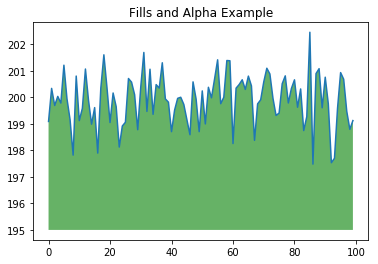

In [30]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where = (ys > 195), facecolor = 'g', alpha = 0.6)

plt.title("Fills and Alpha Example")
plt.show()

#### 로컬에서 Colab으로 업로드 

In [31]:
# colab에서 파일 입출력 패키지
from google.colab import files
uploaded = files.upload()

Saving bmi.csv to bmi.csv


In [32]:
ls -l

total 50588
-rw-r--r-- 1 root root   264209 May 14 10:31 bmi.csv
drwxr-xr-x 3 root root     4096 May 14 10:30 drive/
-rwxr-xr-x 1 root root 34992187 May 10 04:29 ngrok*
-rw-r--r-- 1 root root 16529980 May 14 10:30 ngrok-stable-linux-amd64.zip
drwxr-xr-x 1 root root     4096 May  8 16:22 sample_data/


#### Colab에서 로컬로 다운로드

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('Colab에서 작성된 이 편지는 (이하생략)...')

files.download('example.txt')

## 3교시

---



### 3-1. Linear Regression 소개

In [0]:
# tensorflow 사용
import tensorflow as tf
tf.set_random_seed(777)

In [0]:
# train data
x = [1,2,3]
y = [3,5,7]

>>
$H(x) = Wx + b$ 을 만들자

In [36]:
# W, b : tf.Variable
W = tf.Variable(tf.random_normal([1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# X, Y : tf.placeholder
X = tf.placeholder(tf.float32, shape = [None])
Y = tf.placeholder(tf.float32, shape = [None])

# H(x)
H = X * W + b

Instructions for updating:
Colocations handled automatically by placer.


>>$cost(W,b)=\frac { 1 }{ m } \sum _{ i=1 }^{ m }{ { (H({ x }^{ (i) })-{ y }^{ (i) }) }^{ 2 } } $

In [0]:
# cost(loss) function
# tf.reduce_mean() : 평균, tf.square() : 제곱
cost = tf.reduce_mean(tf.square(H - Y))

In [0]:
# 최소값 찾아가는 코드
# - Gradient Descent : 미분
# - learning_rate : 학습률(최소값 찾아가는 단위)
# - minimize(cost) : 오차를 최소화 하도록
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [39]:
# 그래프 설정하고 훈련데이터를 넣어서 예측되는 직선과 실제값의 오차가 최소가 되는 W,b를 찾자
# - backpropagation : 딥러닝의 핵심 아이디어(나중에 자세히 다루겠음)
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    # 2000번 학습
    for step in range(2001):
        # feed_dict : 설정한 placeholder X,Y에 훈련데이터 x,y를 입력
        cost_val, W_val, b_val, _ = sess.run([cost, W, b, train], 
                                             feed_dict = {X: x, Y: y})
        if step % 500 == 0:
            print(step, cost_val, W_val, b_val)
            
    # 테스트 단계
    print("==== 테스트 ====")
    print("H(1)=",sess.run(H, feed_dict = {X: [1]}),"~3?")
    print("H(4)=",sess.run(H, feed_dict = {X: [4]}),"~9?")

0 12.18349 [1.1611695] [-0.35241237]
500 0.008817647 [2.1087995] [0.75267303]
1000 0.00079449144 [2.0326583] [0.92575985]
1500 7.158311e-05 [2.009803] [0.9777155]
2000 6.453698e-06 [2.0029435] [0.993309]
==== 테스트 ====
H(1)= [2.9962525] ~3?
H(4)= [9.005083] ~9?


### 3-3. Multi-Linear Regression 소개

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

In [0]:
# x1,x2 그리고 y
x = np.array([[60,5.5],
              [65,5.0],
              [55,6.0]],dtype='float32')
y = np.array([[66],[74],[78]],dtype='float32')

In [0]:
# H(X) = XW + b
X = tf.placeholder(tf.float32, shape=[None,2]) # None : 어떤 갯수의 행이 오더라도, 2 : 열 갯수(즉, x1,x2)
Y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([2,1]), name = 'weight') # 2행 1열 행렬
b = tf.Variable(tf.random_normal([1]), name = 'bias')

H = tf.matmul(X,W)+b

In [0]:
# cost function
cost = tf.reduce_mean(tf.square(H - Y))

In [0]:
# gradient descent
train = tf.train.GradientDescentOptimizer(learning_rate = 0.0001).minimize(cost)

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(70001):
        cost_val, h_val, _ = sess.run([cost,H,train], feed_dict = {X:x,Y:y})
        if step % 10000 == 0:
            print("step",step, "\ncost=", cost_val, "\nH(X)=", h_val)

step 0 
cost= 2185.1924 
H(X)= [[26.357828]
 [29.620214]
 [23.095444]]
step 10000 
cost= 26.984116 
H(X)= [[72.52112]
 [73.18777]
 [71.85446]]
step 20000 
cost= 22.639029 
H(X)= [[72.623604]
 [71.412544]
 [73.83466 ]]
step 30000 
cost= 22.258707 
H(X)= [[72.65393]
 [70.88735]
 [74.42051]]
step 40000 
cost= 22.22542 
H(X)= [[72.662895]
 [70.732   ]
 [74.59379 ]]
step 50000 
cost= 22.222504 
H(X)= [[72.66555]
 [70.68607]
 [74.64503]]
step 60000 
cost= 22.222284 
H(X)= [[72.66632 ]
 [70.672745]
 [74.65988 ]]
step 70000 
cost= 22.222216 
H(X)= [[72.66646 ]
 [70.67019 ]
 [74.662735]]


## 4교시

---



### 4-1. Logistic Regression(Classification) 소개
- 당뇨병 분류문제

In [46]:
# data load
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [0]:
import numpy as np
data = np.loadtxt("diabetes.csv", delimiter=',', dtype=np.float32)

In [48]:
data

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]], dtype=float32)

In [0]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

In [0]:
# 학습 데이터 80% / 테스트 데이터 20%를 랜덤하게 나누어 주자
train = data[np.random.choice(len(data), round(len(data)*0.8), replace=False), :]
test = data[np.random.choice(len(data), round(len(data)*0.2), replace=False), :]

In [0]:
x_train = train[:, 0:-1]
y_train = train[:, -1].reshape(len(x_train),1)

x_test = test[:, 0:-1]
y_test = test[:, -1].reshape(len(x_test),1)

In [0]:
# H(X)
# data.shape = (759, 9)
X = tf.placeholder(tf.float32, shape = [None, 8])
Y = tf.placeholder(tf.float32, shape = [None, 1])

W = tf.Variable(tf.random_normal([8,1]), name = 'weight')
b = tf.Variable(tf.random_normal([1]), name = 'bias')

# tf.sigmoid = 1/(1+exp(-x))
H = tf.sigmoid(tf.matmul(X,W)+b)

In [0]:
# cost
cost = -tf.reduce_mean(Y*tf.log(H) + (1 - Y)*tf.log(1 - H))

In [0]:
# gradient descent
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

In [0]:
# 0.5 이상이면 1, 이하이면 0
predicted = tf.cast(H > 0.5, dtype=tf.float32)

# 정확도
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [56]:
with tf.Session() as sess:
    # 변수 초기화
    sess.run(tf.global_variables_initializer())
    
    # 학습
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_train, Y: y_train})
        if step % 5000 == 0:
            print(step, cost_val)

    # 테스트
    c, a = sess.run([predicted, accuracy],
                     feed_dict={X: x_test, Y: y_test})
    for i,j in zip(c,y_test):
        if i == j:
            res = "O"
        else:
            res = "X"
        print("predict", i, "vs", "real",j, "=> res:",res)
        
    print("\nAccuracy:", a)

0 1.006186
5000 0.514534
10000 0.49188563
predict [1.] vs real [0.] => res: X
predict [1.] vs real [0.] => res: X
predict [0.] vs real [0.] => res: O
predict [1.] vs real [1.] => res: O
predict [0.] vs real [0.] => res: O
predict [1.] vs real [1.] => res: O
predict [0.] vs real [0.] => res: O
predict [1.] vs real [1.] => res: O
predict [1.] vs real [1.] => res: O
predict [1.] vs real [0.] => res: X
predict [0.] vs real [1.] => res: X
predict [0.] vs real [0.] => res: O
predict [0.] vs real [0.] => res: O
predict [1.] vs real [0.] => res: X
predict [1.] vs real [1.] => res: O
predict [1.] vs real [1.] => res: O
predict [1.] vs real [1.] => res: O
predict [1.] vs real [1.] => res: O
predict [1.] vs real [1.] => res: O
predict [0.] vs real [1.] => res: X
predict [1.] vs real [0.] => res: X
predict [1.] vs real [1.] => res: O
predict [0.] vs real [0.] => res: O
predict [1.] vs real [1.] => res: O
predict [0.] vs real [0.] => res: O
predict [0.] vs real [0.] => res: O
predict [1.] vs real [

### 4-2. Multinimial Logistic Regression(Softmax Regression) 소개
- 동물종 분류하는 문제

In [57]:
# data load
from google.colab import files
uploaded = files.upload()

Saving zoo.data to zoo.data


In [58]:
# 서로다른 타입의 변수를 불러오려면 pandas의 DataFrame 형식으로 받으면 된다.
import pandas as pd
data = pd.read_table("zoo.data", delimiter=',', 
                     names=["name","hair","feathers","eggs","milk","airborne",
                            "aquatic","predator","toothed","backbone","breathes",
                            "venomous","fins","legs","tail","domestic","catsize",
                            "type"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead.
  


In [59]:
data.head() # 상위 5줄 까지만 확인

,name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [0]:
# 딥러닝에 불필요한 데이터인 "name"은 제외하면서 훈련데이터 80%, 테스트데이터 20%를 램덤하게 나누자
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

data1 = data.iloc[:,1:] # DataFrame에서 Slicing
idx = data1.index

train = data1.iloc[np.random.choice(idx, round(len(idx)*0.8), replace=False), :]
test = data1.iloc[np.random.choice(len(idx), round(len(idx)*0.2), replace=False), :]

In [61]:
# DataFrame을 연산에 편리한 Array로 변환
Train = np.array(train, dtype = np.float32)
Test = np.array(test, dtype = np.float32)

# 훈련데이터 / 테스트데이터 분배
x_train = Train[:, 0:-1]
y_train = Train[:, -1].reshape(len(x_train),1)

x_test = Test[:, 0:-1]
y_test = Test[:, -1].reshape(len(x_test),1)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(81, 16) (81, 1)
(20, 16) (20, 1)


In [0]:
typeNum = 7 # 동물종 타입 갯수

# Softmax Function : H(x)
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])

W = tf.Variable(tf.random_normal([16, typeNum]), name='weight')
b = tf.Variable(tf.random_normal([typeNum]), name='bias')

logits = tf.matmul(X,W)+b
H = tf.nn.softmax(logits)

In [63]:
# one-hot encoding
Y_one_hot = tf.one_hot(Y, typeNum)  
print("one_hot:", Y_one_hot)
Y_one_hot = tf.reshape(Y_one_hot, [-1, typeNum])
print("reshape one_hot:", Y_one_hot)

one_hot: Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)
reshape one_hot: Tensor("Reshape:0", shape=(?, 7), dtype=float32)


In [0]:
# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = tf.stop_gradient([Y_one_hot]), 
                                                                 logits = logits))
# gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# 2차원 배열에서 행단위로 가장 값이 큰 곳의 위치(인덱스)를 리턴
# 즉, one-hot encoding 결과에서 가장 큰 확률값이 나온 인덱스(해당 동물종에 대한 번호)로 분류하는 작업
prediction = tf.argmax(H, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [65]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for step in range(5001):
        _, cost_val, acc_val = sess.run([optimizer, cost, accuracy], feed_dict={X: x_train, Y: y_train})
                                        
        if step % 1000 == 0:
            print("Step: {:5}\tCost: {:.3f}\tAcc: {:.2%}".format(step, cost_val, acc_val))

    # test데이터로 검증실시
    pred, acc = sess.run([prediction,accuracy], feed_dict={X: x_test, Y: y_test})
    
    # test데이터에 대한 실제값과 예측값을 비교
    for p, y in zip(pred, y_test.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
    print("Acc: {:.2%}".format(acc))

Step:     0	Cost: 6.287	Acc: 7.41%
Step:  1000	Cost: 0.536	Acc: 74.07%
Step:  2000	Cost: 0.296	Acc: 83.95%
Step:  3000	Cost: 0.214	Acc: 86.42%
Step:  4000	Cost: 0.172	Acc: 87.65%
Step:  5000	Cost: 0.146	Acc: 87.65%
[True] Prediction: 4 True Y: 4
[True] Prediction: 1 True Y: 1
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 5 True Y: 5
[False] Prediction: 5 True Y: 7
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 2 True Y: 2
[True] Prediction: 1 True Y: 1
[True] Prediction: 4 True Y: 4
[True] Prediction: 2 True Y: 2
[True] Prediction: 2 True Y: 2
Acc: 95.00%


## 7교시

---



### 7-1. XOR문제 실습

- XOR
 - 서로 다를때 True를 리턴하고, 서로 같으면 False를 리턴하는 논리

>
X|Y||Z
---|---||---
0|0||0
0|1||1
1|0||1
1|1||0

- 은닉층 미추가 했을 경우

In [0]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(123) # 시드설정

# XOR
x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
H = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [67]:
# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val, w_val = sess.run(
                  [train, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        if step % 5000 == 0:
            print(step, cost_val, w_val)

    # Accuracy report
    h, c, a = sess.run(
              [H, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.8483199 [[1.151509  ]
 [0.42056292]]
5000 0.6931472 [[1.3318018e-07]
 [1.3354943e-07]]
10000 0.6931472 [[1.3318018e-07]
 [1.3354943e-07]]

Hypothesis:  [[0.5]
 [0.5]
 [0.5]
 [0.5]] 
Correct:  [[0.]
 [0.]
 [0.]
 [0.]] 
Accuracy:  0.5


- 은닉층 추가(XOR문제 해결법)

In [0]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # 시드설정

x_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_data = np.array([[0], [1], [1], [0]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# 핵심부분
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
H = tf.sigmoid(tf.matmul(layer1, W2) + b2)

In [77]:
# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(H) + (1 - Y) * tf.log(1 - H))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Accuracy computation
# True if H > 0.5 else False
predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        _, cost_val = sess.run([train, cost], feed_dict={X: x_data, Y: y_data})
        if step % 5000 == 0:
            print(step, cost_val)

    # Accuracy report
    h, p, a = sess.run(
        [H, predicted, accuracy], feed_dict={X: x_data, Y: y_data}
    )
    
    print(f"\nHypothesis:\n{h} \nPredicted:\n{p} \nAccuracy:\n{a}")

0 0.69044924
5000 0.05235087
10000 0.014664634

Hypothesis:
[[0.01716198]
 [0.9867503 ]
 [0.98675805]
 [0.01456309]] 
Predicted:
[[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:
1.0


In [0]:
# XOR
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)
learning_rate = 0.1
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]
y_data = [[0],
          [1],
          [1],
          [0]]
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

X = tf.placeholder(tf.float32, [None,2])
Y = tf.placeholder(tf.float32, [None,1])

In [71]:
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid function
hypothesis = tf.sigmoid(tf.matmul(X,W)+b)

# Cost/Loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        sess.run(train, feed_dict={X: x_data, Y: y_data})
        if step % 100 == 0:
            print(step, 
                  sess.run(cost, feed_dict={X: x_data, Y: y_data}),
                  sess.run(W))
    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

0 0.8890228 [[-0.23280458]
 [-0.95733535]]
100 0.726444 [[-0.47320104]
 [-0.8765252 ]]
200 0.70835835 [[-0.35923225]
 [-0.57540834]]
300 0.70006466 [[-0.25965223]
 [-0.37527496]]
400 0.6962869 [[-0.18398118]
 [-0.24577835]]
500 0.69457245 [[-0.12871236]
 [-0.16173196]]
600 0.6937946 [[-0.0892565 ]
 [-0.10689756]]
700 0.69344157 [[-0.06150388]
 [-0.07092828]]
800 0.69328105 [[-0.04218154]
 [-0.04721626]]
900 0.6932081 [[-0.02882701]
 [-0.03151664]]
1000 0.69317496 [[-0.019647  ]
 [-0.02108383]]
1100 0.6931598 [[-0.01336228]
 [-0.01412985]]
1200 0.6931529 [[-0.00907313]
 [-0.00948318]]
1300 0.6931498 [[-0.00615291]
 [-0.00637195]]
1400 0.6931484 [[-0.00416841]
 [-0.00428543]]
1500 0.6931477 [[-0.00282176]
 [-0.0028843 ]]
1600 0.6931475 [[-0.00190899]
 [-0.00194238]]
1700 0.6931473 [[-0.00129085]
 [-0.00130869]]
1800 0.69314724 [[-0.00087253]
 [-0.00088206]]
1900 0.6931471 [[-0.0005896 ]
 [-0.00059469]]
2000 0.6931472 [[-0.00039831]
 [-0.00040103]]
2100 0.6931472 [[-0.00026904]
 [-0.00027

In [0]:
with tf.name_scope("layer1") as scope:
    W1 = tf.Variable(tf.random_normal([2,2]), name = 'weight1')
    b1 = tf.Variable(tf.random_normal([2]), name = 'bias1')
    layer1 = tf.sigmoid(tf.matmul(X,W1)+b1)
    
    w1_hist = tf.summary.histogram("weights1",W1)
    b1_hist = tf.summary.histogram("biases1",b1)
    layer1_hist = tf.summary.histogram("layer1",layer1)
    
with tf.name_scope("layer2") as scope:
    W2 = tf.Variable(tf.random_normal([2,1]), name = 'weight2')
    b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
    hypothesis = tf.sigmoid(tf.matmul(layer1,W2)+b2)
    
    w2_hist = tf.summary.histogram("weights2",W2)
    b2_hist = tf.summary.histogram("biases2",b2)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)
    
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1-Y) * tf.log(1-hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)
    
with tf.name_scope("train") as scope:
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [73]:
predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype = tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

with tf.Session() as sess:
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("drive/ColabNotebooks/tb_logs")
    writer.add_graph(sess.graph)
    
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        summary, _ = sess.run([merged_summary, train], 
                              feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step = step)
        
        if step%5000 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}),
                 sess.run([W1,W2]))
          
    h,c,a = sess.run([hypothesis, predicted, accuracy],
                    feed_dict={X:x_data, Y:y_data})
    print("\nHypothesis: ",h,"\nCorrect: ",c,"\nAccuracy: ",a)

0 0.6919452 [array([[-0.39113355,  0.9613498 ],
       [ 0.9765206 , -1.5952718 ]], dtype=float32), array([[-0.5465901 ],
       [-0.26285326]], dtype=float32)]
5000 3.035413e-05 [array([[ 10.911097,  11.54908 ],
       [-10.58645 , -11.440054]], dtype=float32), array([[ 21.006083],
       [-21.083496]], dtype=float32)]
10000 2.2202755e-06 [array([[ 11.773522,  12.375487],
       [-11.446335, -12.269897]], dtype=float32), array([[ 26.20585],
       [-26.29056]], dtype=float32)]

Hypothesis:  [[2.0349103e-06]
 [9.9999774e-01]
 [9.9999750e-01]
 [2.0682962e-06]] 
Correct:  [[0.]
 [1.]
 [1.]
 [0.]] 
Accuracy:  1.0
